In [1]:
!wget 'https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis2/pressure/air.2023.nc'

--2023-05-20 11:39:47--  https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis2/pressure/air.2023.nc
Resolving downloads.psl.noaa.gov (downloads.psl.noaa.gov)... 140.172.38.86
Connecting to downloads.psl.noaa.gov (downloads.psl.noaa.gov)|140.172.38.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105475426 (101M) [application/x-netcdf]
Saving to: ‘air.2023.nc’

100%[======================================>] 105,475,426 15.5MB/s   in 6.2s   

2023-05-20 11:39:54 (16.2 MB/s) - ‘air.2023.nc’ saved [105475426/105475426]



In [1]:
!wget 'https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis2/pressure/air.2022.nc'
!wget 'https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis2/pressure/air.2021.nc'
!wget 'https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis2/pressure/air.2020.nc'
!wget 'https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis2/pressure/air.2019.nc'
!wget 'https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis2/pressure/air.2018.nc'

--2023-05-20 20:50:00--  https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis2/pressure/air.2022.nc
Resolving downloads.psl.noaa.gov (downloads.psl.noaa.gov)... 140.172.38.86
Connecting to downloads.psl.noaa.gov (downloads.psl.noaa.gov)|140.172.38.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 316874237 (302M) [application/x-netcdf]
Saving to: ‘air.2022.nc’

100%[======================================>] 316,874,237 23.0MB/s   in 14s    

2023-05-20 20:50:14 (22.1 MB/s) - ‘air.2022.nc’ saved [316874237/316874237]

--2023-05-20 20:50:14--  https://downloads.psl.noaa.gov/Datasets/ncep.reanalysis2/pressure/air.2021.nc
Resolving downloads.psl.noaa.gov (downloads.psl.noaa.gov)... 140.172.38.86
Connecting to downloads.psl.noaa.gov (downloads.psl.noaa.gov)|140.172.38.86|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 316842734 (302M) [application/x-netcdf]
Saving to: ‘air.2021.nc’

100%[======================================>] 316,842,

In [3]:
import glob
import xarray as xr

In [6]:
nc_path_files = glob.glob('data/*.nc')
nc_path_files

['data/air.2018.nc',
 'data/air.2019.nc',
 'data/air.2020.nc',
 'data/air.2021.nc',
 'data/air.2022.nc']

In [484]:
latitud_indice_min = -5
latitud_indice_max = 12.5
longitud_indice_min = 280
longitud_indice_max = 295

In [490]:
for h in [0,6]:
    cubes = []
    for nc_path_file in nc_path_files:
        ds = xr.load_dataset(nc_path_file)
        cubes.append(ds.sel(time=(ds['time.hour'] == h), level=(ds['level']==1000),lon=slice(longitud_indice_min, longitud_indice_max), lat=slice(latitud_indice_max,latitud_indice_min)))
        ds.close()
    # Fusionar los datasets en uno solo
    merged_ds = xr.merge(cubes)
    merged_ds.to_netcdf(f'air-h{h}-2018-2022.nc')
    merged_ds.close()
    cube_merged = xr.load_dataset(f'air-h{h}-2018-2022.nc')
    data_len, _,lat_dim, lon_dim = cube_merged.air.shape
    np.save(f'np-array-h{h}',cube_merged.air.data.reshape((data_len,lat_dim* lon_dim)))
    cube_merged.close()
    print(f'H{h} ha sido almacena con éxito')

H0 ha sido almacena con éxito
H6 ha sido almacena con éxito


In [491]:
for h in [0,6]:
    ds = xr.load_dataset('air.2023.nc')
    cube_selected = ds.sel(time=(ds['time.hour'] == h), level=(ds['level']==1000),lon=slice(longitud_indice_min, longitud_indice_max), lat=slice(latitud_indice_max,latitud_indice_min))
    ds.close()
    cube_selected.to_netcdf(f'air-h{h}-2023.nc')
    cube_selected.close()
    cube_h = xr.load_dataset(f'air-h{h}-2023.nc')
    data_len, _,lat_dim, lon_dim = cube_h.air.shape
    np.save(f'np-array-h{h}-2023',cube_h.air.data.reshape((data_len,lat_dim* lon_dim)))
    cube_h.close()

In [493]:
X = np.load('np-array-h0.npy')
X

array([[297.3    , 297.71   , 297.59998, ..., 298.3    , 298.9    ,
        300.09998],
       [298.09998, 298.     , 298.21   , ..., 297.81   , 299.59998,
        301.5    ],
       [298.8    , 299.     , 299.21   , ..., 299.3    , 299.9    ,
        301.     ],
       ...,
       [298.9    , 299.1    , 299.3    , ..., 300.1    , 299.3    ,
        299.5    ],
       [299.6    , 300.2    , 300.2    , ..., 298.9    , 298.3    ,
        298.5    ],
       [300.4    , 300.4    , 300.2    , ..., 299.30002, 299.30002,
        300.1    ]], dtype=float32)

In [494]:
Y = np.load('np-array-h6.npy')
Y

array([[298.     , 298.3    , 298.09998, ..., 297.21   , 297.8    ,
        298.4    ],
       [298.     , 298.31   , 298.4    , ..., 296.71   , 297.59998,
        298.59998],
       [298.09998, 298.5    , 298.8    , ..., 298.7    , 299.2    ,
        300.09998],
       ...,
       [299.     , 299.80002, 300.     , ..., 298.1    , 297.6    ,
        297.5    ],
       [299.9    , 300.4    , 300.2    , ..., 297.1    , 296.9    ,
        297.1    ],
       [300.19998, 300.5    , 300.1    , ..., 296.69998, 297.     ,
        297.5    ]], dtype=float32)

In [495]:
X_test = np.load('np-array-h0-2023.npy')
X_test

array([[300.125 , 300.3125, 300.375 , ..., 298.    , 298.1875, 299.1875],
       [300.1875, 300.125 , 299.8125, ..., 297.1875, 297.6875, 299.1875],
       [299.5   , 299.125 , 299.3125, ..., 297.8125, 298.125 , 299.125 ],
       ...,
       [301.    , 300.3125, 300.875 , ..., 299.125 , 300.    , 300.8125],
       [301.125 , 300.875 , 301.3125, ..., 299.8125, 300.8125, 301.375 ],
       [301.125 , 300.8125, 301.125 , ..., 299.1875, 299.5   , 299.8125]],
      dtype=float32)

In [496]:
Y_test = np.load('np-array-h6-2023.npy')
Y_test

array([[300.5   , 301.1875, 301.    , ..., 297.3125, 297.3125, 297.6875],
       [299.8125, 299.875 , 299.375 , ..., 296.8125, 297.125 , 298.125 ],
       [298.875 , 299.1875, 299.125 , ..., 296.875 , 297.3125, 298.125 ],
       ...,
       [300.375 , 300.5   , 301.    , ..., 298.3125, 299.    , 299.1875],
       [300.875 , 301.    , 301.125 , ..., 297.5   , 298.1875, 298.875 ],
       [300.625 , 300.5   , 300.625 , ..., 299.    , 299.5   , 299.3125]],
      dtype=float32)

In [497]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [521]:
model = LinearRegression()
model.fit(X,Y)
print(f'R^2: {model.score(X_test,Y_test)}')
print(f'MAE: {mean_absolute_error(Y_test,model.predict(X_test))}')
print(f'MAPE: {mean_absolute_percentage_error(Y_test,model.predict(X_test))}')

R^2: 0.5664530815224169
MAE: 0.5009465217590332
MAPE: 0.0016759112477302551


In [499]:
model = RandomForestRegressor()
model.fit(X,Y)
print(f'R^2: {model.score(X_test,Y_test)}')
print(f'MAE: {mean_absolute_error(Y_test,model.predict(X_test))}')
print(f'MAPE: {mean_absolute_percentage_error(Y_test,model.predict(X_test))}')

R^2: 0.37800020640736287
MAE: 0.5997427690596808
MAPE: 0.0020062483287606107


In [500]:
model = DecisionTreeRegressor()
model.fit(X,Y)
print(f'R^2: {model.score(X_test,Y_test)}')
print(f'MAE: {mean_absolute_error(Y_test,model.predict(X_test))}')
print(f'MAPE: {mean_absolute_percentage_error(Y_test,model.predict(X_test))}')

R^2: -0.30541617947938554
MAE: 0.8621759414672852
MAPE: 0.002884085895734636


In [654]:
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X,Y)
print(f'R^2: {model.score(X_test,Y_test)}')
print(f'MAE: {mean_absolute_error(Y_test,model.predict(X_test))}')
print(f'MAPE: {mean_absolute_percentage_error(Y_test,model.predict(X_test))}')

R^2: 0.38619797489725133
MAE: 0.5971375107765198
MAPE: 0.0019977844785898924


In [502]:
model = XGBRegressor()
model.fit(X,Y)
print(f'R^2: {model.score(X_test,Y_test)}')
print(f'MAE: {mean_absolute_error(Y_test,model.predict(X_test))}')
print(f'MAPE: {mean_absolute_percentage_error(Y_test,model.predict(X_test))}')

R^2: 0.5043123964988808
MAE: 0.5345988869667053
MAPE: 0.0017886541318148375


In [549]:
X_pred = model.predict([X_test[0]])
X_pred

array([[299.5887 , 299.96967, 299.82498, 299.33405, 298.79666, 298.46484,
        298.313  , 299.45648, 299.776  , 299.6889 , 299.07455, 298.14294,
        297.36447, 297.10727, 299.7352 , 299.79456, 299.6069 , 298.8709 ,
        297.70465, 296.72354, 296.437  , 299.37314, 299.28873, 299.14664,
        298.6011 , 297.70197, 296.96194, 296.7564 , 297.8527 , 298.12943,
        298.31006, 298.09637, 297.66513, 297.3605 , 297.2708 , 296.49292,
        297.45837, 297.91467, 297.65167, 297.35828, 297.41183, 297.48126,
        296.59286, 298.0401 , 298.30988, 297.54855, 296.98822, 297.23413,
        297.60864, 297.4183 , 298.82184, 298.79224, 297.58557, 296.75696,
        297.0307 , 297.74622]], dtype=float32)

In [275]:
import iris
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
import imageio
from PIL import Image
import pandas as pd


In [510]:
cube = iris.load_cube('air-h0-2023.nc')
cube

<iris 'Cube' of air_temperature / (degK) (time: 120; Level: 1; latitude: 8; longitude: 7)>

In [513]:
lats = [12.5, 10. ,  7.5 , 5.  , 2.5 , 0.,  -2.5 ,-5. ]
lons = [280.,  282.5 ,285. , 287.5 ,290.  ,292.5 ,295. ]
print('latitudes: ', lats)
print('longitudes: ', lons)

latitudes:  [12.5, 10.0, 7.5, 5.0, 2.5, 0.0, -2.5, -5.0]
longitudes:  [280.0, 282.5, 285.0, 287.5, 290.0, 292.5, 295.0]


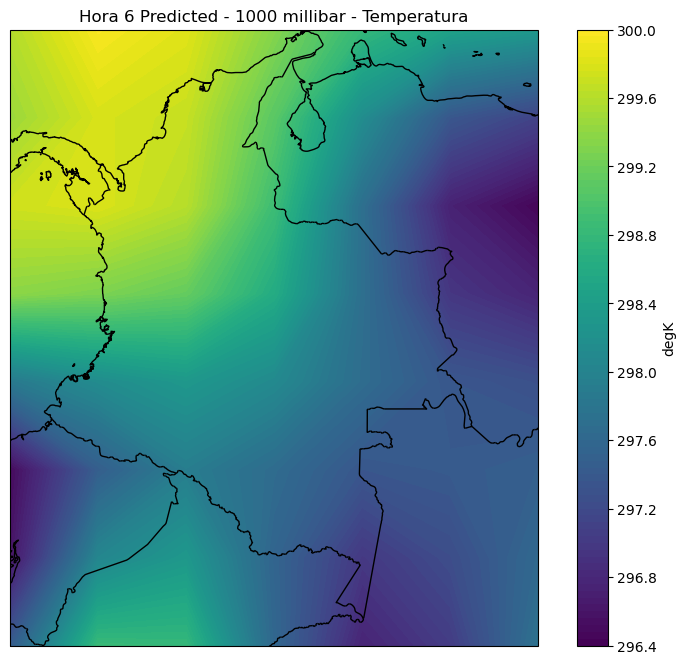

In [550]:
# Configura el mapa y la proyección
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
# Agrega características del mapa
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1, edgecolor='k')

# Grafica los datos
plt.contourf(lons, lats, X_pred.reshape(lat_dim, lon_dim),
             transform=ccrs.PlateCarree(), cmap='viridis', levels=100)
# Muestra el gráfico
plt.colorbar(label=cube.units)
plt.title('Hora 6 Predicted - 1000 millibar - Temperatura')
plt.show()

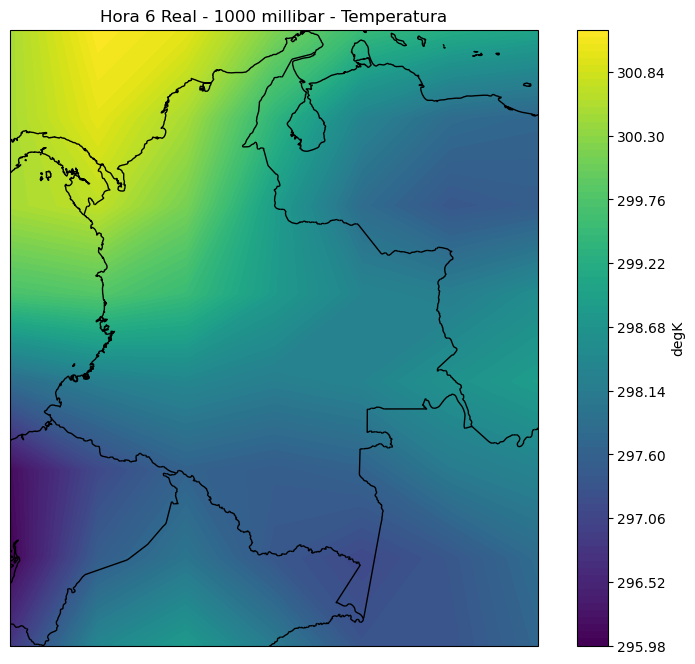

In [551]:
# Configura el mapa y la proyección
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
# Agrega características del mapa
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1, edgecolor='k')

# Grafica los datos
plt.contourf(lons, lats, Y_test[0].reshape(lat_dim, lon_dim),
             transform=ccrs.PlateCarree(), cmap='viridis', levels=100)
# Muestra el gráfico
plt.colorbar(label=cube.units)
plt.title('Hora 6 Real - 1000 millibar - Temperatura')
plt.show()

Text(0.5, 1.0, 'Análisis de error')

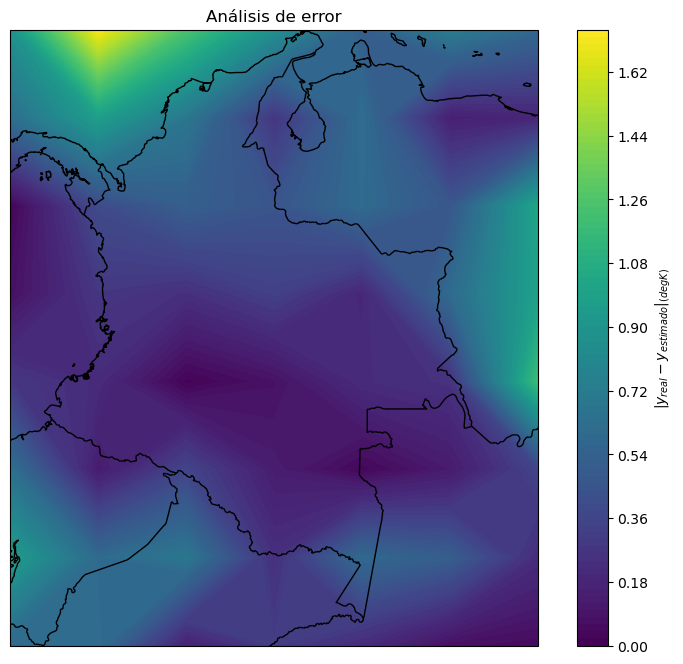

In [538]:
# Configura el mapa y la proyección
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
# Agrega características del mapa
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1, edgecolor='k')

# Grafica los datos
plt.contourf(lons, lats, np.abs(Y_test[0].reshape(lat_dim, lon_dim)- X_pred.reshape(lat_dim, lon_dim)),
             transform=ccrs.PlateCarree(), cmap='viridis', levels=100)
# Muestra el gráfico
plt.colorbar(label='$|y_{real} - y_{estimado}|_{(degK)}$')
plt.title('Análisis de error')
# plt.show()

In [636]:
np.random.randint(20,size=10)

array([12, 14,  6, 12,  2, 18, 11, 14, 11,  3])

In [642]:
image_paths = []
for i in np.random.randint(100,size=10):
    X_pred = model.predict([X_test[i]])

    # Configurar el tamaño y diseño de los subplots
    fig, axs = plt.subplots(1, 3, figsize=(18, 8), subplot_kw={'projection': ccrs.PlateCarree()})

    # Configurar características del mapa en todos los subplots
    for ax in axs:
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1, edgecolor='k')

    # Graficar el primer subplot con los datos X_pred
    cs1 = axs[0].contourf(lons, lats, X_pred.reshape(lat_dim, lon_dim),
                          transform=ccrs.PlateCarree(), cmap='viridis', levels=100)
    plt.colorbar(cs1, ax=axs[0], label=cube.units)
    axs[0].set_title('Hora 6 estimada - 1000 millibar - Temperatura')

    # Graficar el segundo subplot con los datos Y_test
    cs2 = axs[1].contourf(lons, lats, Y_test[i].reshape(lat_dim, lon_dim),
                          transform=ccrs.PlateCarree(), cmap='viridis', levels=100)
    plt.colorbar(cs2, ax=axs[1], label=cube.units)
    axs[1].set_title('Hora 6 Real - 1000 millibar - Temperatura')

    # Graficar el tercer subplot con el análisis de error
    cs3 = axs[2].contourf(lons, lats, np.abs(Y_test[i].reshape(lat_dim, lon_dim) - X_pred.reshape(lat_dim, lon_dim)),
                          transform=ccrs.PlateCarree(), cmap='viridis', levels=100)
    plt.colorbar(cs3, ax=axs[2], label='$|y_{real} - y_{estimado}|_{(degK)}$')
    axs[2].set_title('Análisis de error')

    # Ajustar los espacios entre subplots
    plt.tight_layout()
    image_path = f'imgs/barranquilla{i}.png'
    
    # Guarda la imagen sin marcos
    plt.savefig(image_path, bbox_inches='tight', pad_inches=0)
    # Agrega la ruta de la imagen a la lista
    image_paths.append(image_path)
    # Cierra la figura
    plt.close()

In [416]:
latitud_indice_min = -5  # Índice correspondiente a la latitud de 90 (límite norte)
latitud_indice_max = 12.5  # Índice correspondiente a la latitud de 40 (límite sur)

longitud_indice_min = 277.5  # Índice correspondiente a la longitud de -82.5 (límite oeste)
longitud_indice_max = 297.5

In [138]:
# time_constraint = iris.Constraint(time=lambda cell: cell.point.hour == 0, air_pressure = lambda cell: cell == 925, coord_values={'latitude':lambda cell: latitud_indice_min <=cell<=latitud_indice_max, 'longitude': lambda cell: longitud_indice_min+180<= cell < longitud_indice_max+180 })
time_constraint = iris.Constraint(time=lambda cell: cell.point.hour == 0, Level = lambda cell: cell == 925,
                                    coord_values=
                                                {
                                                'latitude':lambda cell: latitud_indice_min <=cell<=latitud_indice_max,
                                                'longitude': lambda cell: longitud_indice_min< cell< longitud_indice_max
                                                })

In [139]:
ext_data = cube.extract(time_constraint)
ext_data

<iris 'Cube' of air_temperature / (degK) (time: 365; latitude: 8; longitude: 7)>

In [197]:
ext_data.coord('longitude').points, ext_data.coord('latitude').points

(array([280. , 282.5, 285. , 287.5, 290. , 292.5, 295. ], dtype=float32),
 array([12.5, 10. ,  7.5,  5. ,  2.5,  0. , -2.5, -5. ], dtype=float32))

In [169]:
image_paths = []
for i in range(15):
    # Configura el mapa y la proyección
    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    # Agrega características del mapa
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1, edgecolor='k')

    # Grafica los datos
    plt.contourf(ext_data.coord('longitude').points, ext_data.coord('latitude').points, ext_data[i].data,
                 transform=ccrs.PlateCarree(), cmap='viridis', levels=100)
    # Ajusta los límites del mapa
#     ax.set_extent([-78.990935, -66.876281, -4.231687, 12.458258], crs=ccrs.PlateCarree())


    # Muestra el gráfico
    plt.colorbar(label=cube.units)
    plt.title('Temperatura - Colombia')
    # Ajusta los márgenes y los marcos
#     ax.margins(0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    image_path = f'imgs/barranquilla{i}.png'
    # Guarda la imagen sin marcos
    plt.savefig(image_path, bbox_inches='tight', pad_inches=0)
    # Agrega la ruta de la imagen a la lista
    image_paths.append(image_path)
    # Cierra la figura
    plt.close()

In [643]:
# Obtener las dimensiones de la primera imagen
imagen_base = Image.open(image_paths[0])
width, height = imagen_base.size

# Crear una lista para almacenar las imágenes redimensionadas
images_resized = []
for filename in image_paths:
    # Abrir la imagen
    imagen = Image.open(filename)
    
    # Redimensionar la imagen al mismo tamaño que la imagen base
    imagen_resized = imagen.resize((width, height))
    
    # Agregar la imagen redimensionada a la lista
    images_resized.append(imagen_resized)

# Guardar el GIF utilizando la biblioteca imageio
output_gif = 'animacion.gif'
imageio.mimsave(output_gif, images_resized, 'GIF', duration=1200, loop=2)

print('GIF creado exitosamente:', output_gif)

GIF creado exitosamente: animacion.gif
